https://machinelearningmastery.com/machine-learning-in-python-step-by-step/

In [5]:
import matplotlib.pyplot as plt
from sklearn import model_selection
from pandas.tools.plotting import scatter_matrix
#from sklearn.metrics import classification_report
#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import accuracy_score

def kfold(models, train_X, train_y, seed=7, scoring='accuracy', n_splits=10):
    results = []
    names = []
    for name, model in models:
        kfold = model_selection.KFold(n_splits=n_splits, random_state=seed)
        cv_results = model_selection.cross_val_score(model, train_X, train_y, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)        

    # Compare Algorithms
    fig = plt.figure()
    fig.suptitle('Algorithm Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

models = []

models.append(('LR', LogisticRegression()))
#models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [3]:
from sklearn import datasets
iris = datasets.load_iris()

train_X = iris.data
train_y = iris.target

LR: 0.880000 (0.148474)
KNN: 0.933333 (0.084327)
CART: 0.940000 (0.086667)
NB: 0.946667 (0.058119)
SVM: 0.953333 (0.052068)


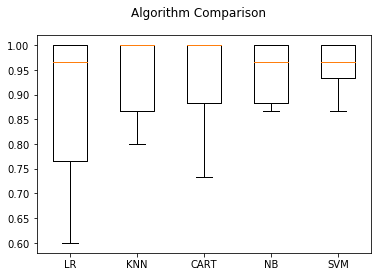

In [4]:
kfold(models, train_X, train_y)